# Лабораторна робота №8

# Дисперсійний аналіз

### Любченко Мирослави

Припустимо, що є три незалежні групи кожна з яких пройшла тест на запам'ятовування 10 слів. Першій групі слова демонструвалися з низькою швидкістю - 1 слово в 5 секунд, другій  з середньою швидкістю - 1 слово в 2 секунди, і третій групі з великою швидкістю - 1 слово в секунду.

Прикладом задачі, яка вирішується методом дисперсійного аналізу є аналіз впливу швидкості демонстрації слів на результат тесту. 

n  | Група 1 (низька швидкість) | Група 2 (середня швидкість) | Група 3 (висока швидкість) |
------------- | ------------- |--------- | ------------- | 
1  | 8   | 7   | 4   | 
2  | 7   | 8   |5   | 
3  | 9   | 5   |3   |
4  | 5   | 4   |6   | 
5  | 6  | 6   |2  |  
6  | 8   | 7  |4  | 
Сума  | 43   | 37  |24   |
Середні  | 7,17   | 3,17   |4  | 

Загальна сума - 104

Основні величини для однофакторного дисперсійного аналізу:
1. $T_c$, cуми індивідуальних значень по кожнії з груп: 43, 37, 24.
2. $\sum{T^2_c}$,  cума квадратів сумарних значень по кожній з груп: $43^2 +  37^2 + 24^2 = 3794$
3. $c$, кількість умов (градацій фактора/ груп): 3
4. $n$, кількість досліджень в групах: 6, 6, 6.
5. $N$, загальна кількість досліджень: 18.
6. $(\sum{x_i})^2$, квадрат загальної суми індивідуальних значень: 10 816
7. $\frac{(\sum{x_i})^2}{N}$,Константа, яку потрібно відняти від кожної суми квадратів:  600,9
8. $x_i$, індивідуальне значення
9. $\sum({x_i}^2)$, сума квадратів індивідуальних значень.


Тоді, послідовність операцій в однофакторному дисперсійному аналізі виглядає наступним чином:
1. Розрахувати внутрішньогрупову дисперсію ($SS_{факт}$).

$$ SS_{факт}  = \frac{\sum{T^2_c}}{n} - \frac{(\sum{x_i})^2}{N} = \frac{3794}{6} - \frac{10 816}{18} = 31,44$$

2. Розрахувати загальногрупову дисперсію ($SS_{заг}$).
$$ SS_{заг} = \sum({x_i}^2) - \frac{(\sum{x_i})^2}{N} =  8^2+7^2+9^2+5^2+6^2+8^2+7^2+7^2+8^2+5^2+ 4^2+ 6^2+ 7^2+ 4^2+ 5^2+ 3^2+ 6^2+ 2^2+ 4^2 - \frac{104^2}{18} = 63,11$$

3. Розрахувати випадкову (залишкову) величину $SS_{вип}$
$$ SS_{вип} = SS_{заг} - SS_{факт} = 63,11 -31,44 = 31,67 $$

4. Визначити кількість ступенів свободи:
$$d_{факт} = c - 1 = 3 - 1 = 2$$
$$d_{заг} = N - 1 = 18 - 1 = 17$$
$$d_{вип} = d_{заг} - d_{факт} = 17 - 2 = 15$$

5. Розділити кожну SS на відповідне число ступенів свободи:
$$MS_{факт} = \frac{SS_{факт}}{d_{факт}} = \frac{31,44}{2} = 15,72$$
$$MS_{вип} = \frac{SS_{вип}}{d_{вип}} = \frac{31,67}{15} = 2,11$$

6. Розрахувати значення $F_{емпір}$
$$ F_{емпір} = \frac{MS_{факт}}{MS_{вип}} = \frac{15,72}{2,11} = 7,45 $$

7. Визначити критичне значення F по таблиці критичних значень: 

$$F_{крит(2,15)} = 3,7 $$

8. Співставити емпіричне та критичне значення F.

При $F_{емпір} \geq F_{крит(2,15)}$ нульова гіпотеза про рівність середніх відхиляється.

$$7,45 > 3,7$$ - рівність середніх не підтверджена.

### Завдання

1. Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).
2. Побудувати графік розкиду в групах.
3. Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.
4. Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.
5. Перевірити результат роботи функції на реальних або сгенерованих даних. Зробити висновок.

### Розв'язання:

In [2]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

Розглянемо дані "Збут маргарину". У ньому наведено дані про обсяги продажів маргарину.

Директор мережі супермаркетів хоче знати, чи впливає на збут маргарину різне позиціонування товару в супермаркеті. В одному з супермаркетів маргарин розташований на так званих "нормальних полицях", в іншому - у варіанті "парного розміщення", в третьому - в "холодильнику". Передбачається, що всі три супермаркети знаходяться в однакових умовах (розташування, близькість конкурентів і т.д.).

Можна припустити, що якщо розміщення товару не впливає на обсяг збуту, то середні значення обсягів збуту маргарину для кожного з варіанту розміщень будуть приблизно рівні. Наступна таблиця показує результати трьох вибірок. У кожному разі експеримент тривав один і той же час, протягом 1000 касових операцій

In [244]:
table1=[]
table1 = [47,39,40,46,45,43]
table2=[]
table2 = [68,65,63,59,67,64]
table3=[]
table3 = [59,50,51,48,53,52]

df = pd.DataFrame({
    '1 - нормальні полиці': table1,
    '2 - парне розміщення': table2,
    '3 - холодильник': table3
}, index=np.arange(1, len(table1)+1))
df.columns.name = 'Супермаркет'
df.index.name = 'День'
print('Збут маргарину за 1000 касових операцій в трьох супермаркетах в залежності від розміщення в кг')
df


Збут маргарину за 1000 касових операцій в трьох супермаркетах в залежності від розміщення в кг


Супермаркет,1 - нормальні полиці,2 - парне розміщення,3 - холодильник
День,,,
1,47,68,59
2,39,65,50
3,40,63,51
4,46,59,48
5,45,67,53
6,43,64,52


In [245]:
sum1=round((sum(table1)/len(table1)),2)
sum2=round((sum(table2)/len(table2)),2)
sum3=round((sum(table3)/len(table3)),2)

sd1=round((df['1 - нормальні полиці'].std()),2)
sd2=round((df['2 - парне розміщення'].std()),2)
sd3=round((df['3 - холодильник'].std()),2)
new_df = pd.DataFrame({
    '1 - нормальні полиці': table1,
    '2 - парне розміщення': table2,
    '3 - холодильник': table3
}, index=np.arange(1, len(table1)+1))
new_df.columns.name = 'Супермаркет'
new_df.index.name = 'День'
new_df.loc["Середнє:"] = [sum1,sum2,sum3]
new_df.loc["Стандартне відхилення:"] = [sd1,sd2,sd3]
new_df

Супермаркет,1 - нормальні полиці,2 - парне розміщення,3 - холодильник
День,,,
1,47.00,68.00,59.00
2,39.00,65.00,50.00
3,40.00,63.00,51.00
4,46.00,59.00,48.00
5,45.00,67.00,53.00
6,43.00,64.00,52.00
Середнє:,43.33,64.33,52.17
Стандартне відхилення:,3.27,3.20,3.76


[]

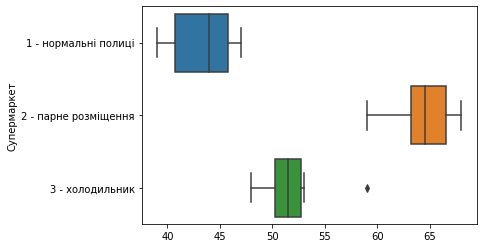

In [246]:
sns.boxplot(data=df, orient='h').set()

In [247]:
def dispersia(inf):
    c = (len(inf.iloc[0,:]))
    Tc=0
    Tc2=0
    for i in range (c):
        Tc=sum(inf.iloc[:,i])
        Tc2+=(Tc)**2
    n=0
    N=0
    for i in range(c):
        n=len(inf.iloc[:,i])
        N+=n
    summ2=0
    T=0
    
    for i in range (c):
        T=sum(inf.iloc[:,i])
        summ2+=T
    summ2=(summ2)**2
    summ1=0
    for i in range (c):
        for j in range(len(inf.iloc[:,i-1])):
            summ1+=(inf.iloc[j][i])**2
                      
    konst=summ2/N
    SSfact=(Tc2/n)-konst
    SSzag=summ1-((summ2)/N)
    SSvip=SSzag-SSfact
    dfact=c-1
    dzag=N-1
    dvip=dzag-dfact
    MSfact=SSfact/dfact
    MSvip=SSvip/dvip
    Femp=MSfact/MSvip
    if((26<(dvip) and (dvip)<= 28)):
        dvip = 26
    elif((28<(dvip) and (dvip)<= 30)):
        dvip = 27
    elif((dvip) > 30 and (dvip) <= 40):
        dvip = 28
    elif((dvip) > 40 and (dvip) <= 60):
        dvip = 29
    elif((dvip) > 60 and (dvip) <= 120):
        dvip = 30
    elif((dvip) > 120):
        dvip = 31
    else:
        dvip = dvip
        
    if(10<n  and n<= 15):
        dfact = 11
    elif(15< n and n<= 20):
        dfact = 12
    elif( 20<n and n<= 30):
        dfact = 13
    elif(n> 30):
        dfact= 14
    else:
        dfact = c - 1
    Fkrit=pd.read_excel("Таблиця критичних значень для критерію Фішера.xlsx").iloc[dvip,dfact]  
    if(Femp>=Fkrit):
        result = "Нульова гіпотеза про рівність середніх відхиляється, рівність середніх не підтверджена"
    else:
        result = "Нульова гіпотеза про рівність середніх приймається, рівність середніх підтверджена"
    new__df = pd.DataFrame({
        "Характеристика" : ['Внутрішньогрупова дисперсія ($SS_{факт}$)','Загальногрупова дисперсія ($SS_{заг}$)', 'Випадкова (залишкова) величина $SS_{вип}$',
                           'Kількість ступенів свободи: $d_{факт} = c - 1:$' ,'Kількість ступенів свободи: $d_{заг} = N - 1 :$' , 'Kількість ступенів свободи: $d_{вип}$', '$MS_{факт}: $', '$MS_{вип}: $',
                           'Значення $F_{емпір}$: ','Kритичне значення $F_{крит}$:', "Результат"],
        "Обчислене значення" : [ str(round(SSfact,2)) , str(round(SSzag,2)) ,str(round(SSvip,2)),str(dfact),str(dzag), str(dvip), str(round(MSfact,2)),str(round(MSvip,2)),str(round(Femp,2)), str(Fkrit), result]})
    
    return new__df
               

In [248]:
dispersia(df)

,Характеристика,Обчислене значення
0,Внутрішньогрупова дисперсія ($SS_{факт}$),1334.11
1,Загальногрупова дисперсія ($SS_{заг}$),1509.61
2,Випадкова (залишкова) величина $SS_{вип}$,175.5
3,Kількість ступенів свободи: $d_{факт} = c - 1:$,2
4,Kількість ступенів свободи: $d_{заг} = N - 1 :$,17
5,Kількість ступенів свободи: $d_{вип}$,15
6,$MS_{факт}: $,667.06
7,$MS_{вип}: $,11.7
8,Значення $F_{емпір}$:,57.01
9,Kритичне значення $F_{крит}$:,3.68


Висновок: 

    оскільки F емпіричне більше, ніж F критичне, то нульова гіпотеза про рівність середніх відхиляється, рівність середніх    не підтверджена. Тож, приймаємо альтернативну гіпотезу - середні не всі рівні між собою, тобто принаймні у двох сукупно-      стей середні різняться.
    
    У нашому прикладі альтернативна гіпотеза стверджує, що середні значення обсягів продажів розрізняються не випадково, з  чого випливає, що розташування товару впливає на його обсяг збуту